Prompt: write python code that first imports pandas, seaborn, matplotlib.pyplot, and plotly.express and then loads the file named "card_transdata.csv" using pandas. the file is located in the same directory as the code. 

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [25]:
# Load the CSV file
data = pd.read_csv('card_transdata.csv')

# Display the first few rows of the dataframe
print(data.head())

   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        0.362663              1.0        1.0   
4                        2.222767              1.0        1.0   

   used_pin_number  online_order  fraud  
0              0.0           0.0    0.0  
1              0.0           0.0    0.0  
2              0.0           1.0    0.0  
3              0.0           1.0    0.0  
4              0.0           1.0    0.0  


Prompt: print the shape, information, and description of the newly created dataframe

In [26]:
# Print the shape of the dataframe
print("Shape of the dataframe:", data.shape)

# Print the information of the dataframe
print("\nInformation of the dataframe:")
print(data.info())

# Print the description of the dataframe
print("\nDescription of the dataframe:")
print(data.describe())

Shape of the dataframe: (1000000, 8)

Information of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB
None

Description of the dataframe:
       distance_from_home  distance_from_last_transaction  \
count      1000000.000000                  1000000.00

Prompt:check for null values in the dataframe, create a new dataframe from dropping rows with missing values, and then display the first few rows of the new dataframe

In [27]:
# Check for null values in the dataframe
null_values = data.isnull().sum()
print("Null values in each column:\n", null_values)

# Create a new dataframe by dropping rows with missing values
cleaned_data = data.dropna()

# Display the first few rows of the new dataframe
print("\nFirst few rows of the cleaned dataframe:")
print(cleaned_data.head())

Null values in each column:
 distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

First few rows of the cleaned dataframe:
   distance_from_home  distance_from_last_transaction  \
0           57.877857                        0.311140   
1           10.829943                        0.175592   
2            5.091079                        0.805153   
3            2.247564                        5.600044   
4           44.190936                        0.566486   

   ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                        1.945940              1.0        1.0   
1                        1.294219              1.0        0.0   
2                        0.427715              1.0        0.0   
3                        

Prompt: create seaborn countplots, with descriptive titles and axis labels for the distribution of the fraud, used pin, repeat retailer, used chip, and online order columns of the cleaned dataframe

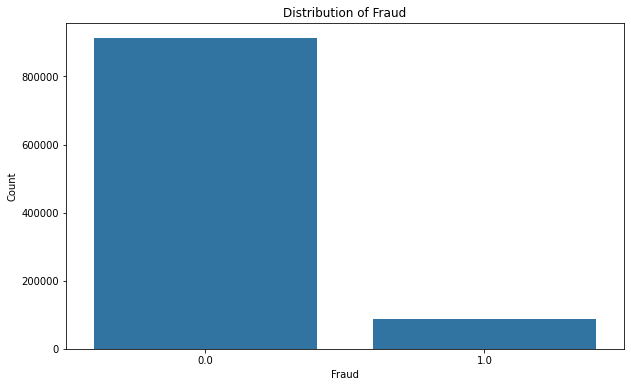

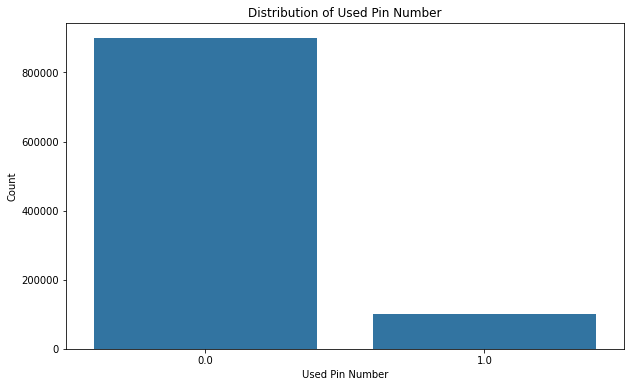

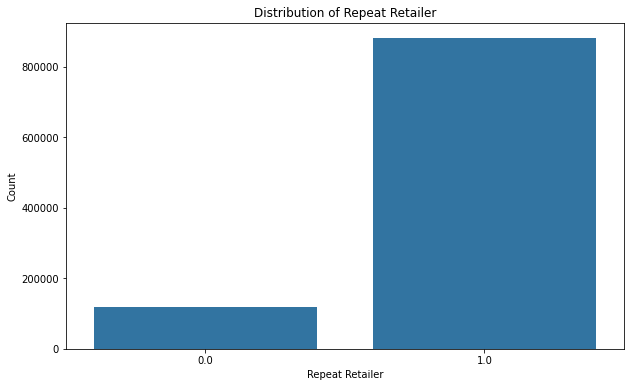

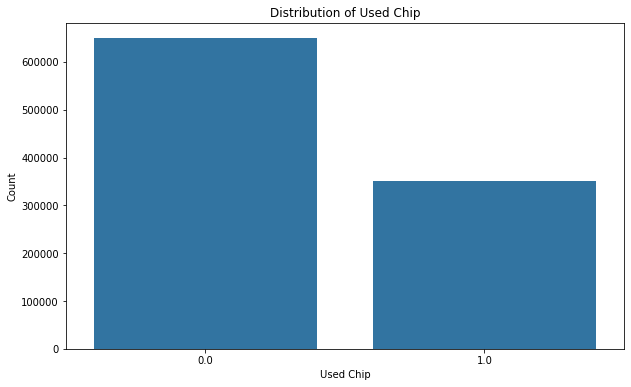

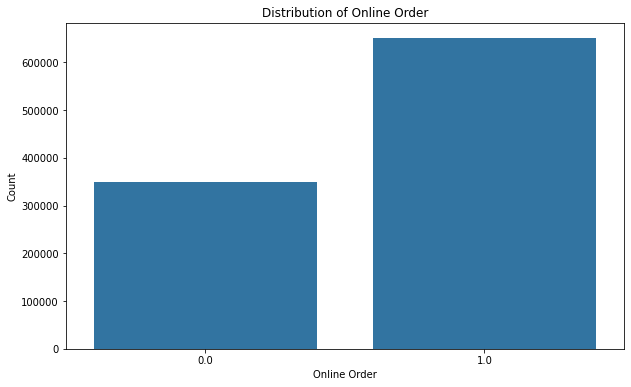

In [28]:
# Create seaborn countplots for the specified columns
columns_to_plot = ['fraud', 'used_pin_number', 'repeat_retailer', 'used_chip', 'online_order']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cleaned_data, x=column)
    plt.title(f'Distribution of {column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Count')
    plt.show()

Prompt: create histograms with the distance from last transaction column, distance from home, and ratio to median purchase price column, they should have a title, label axis, and 30 bins

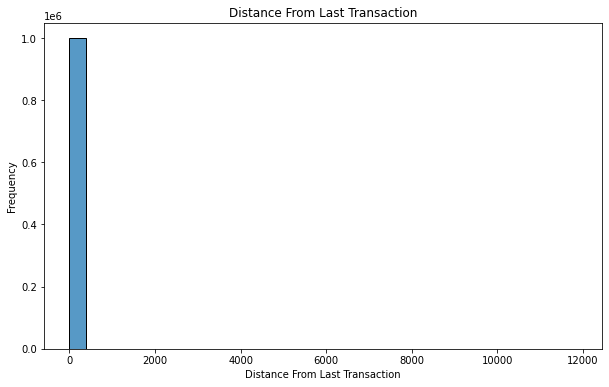

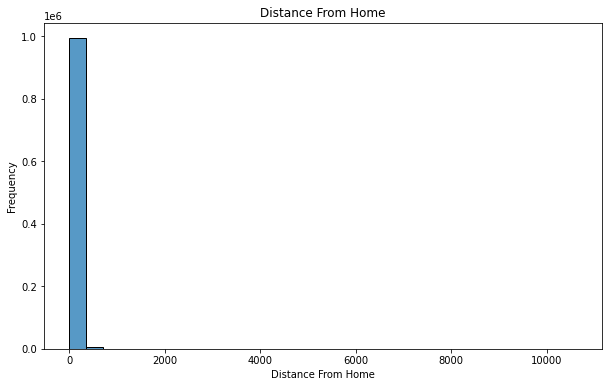

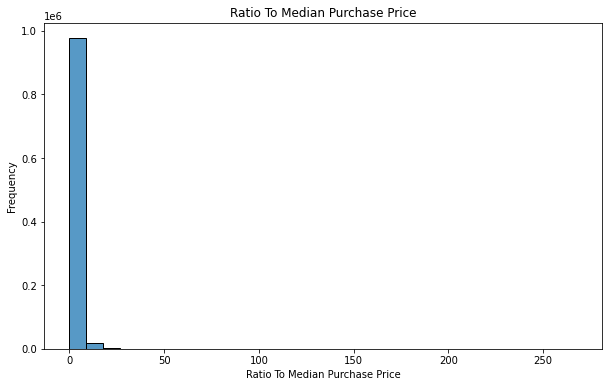

In [29]:
# Create histograms for the specified columns
hist_columns = ['distance_from_last_transaction', 'distance_from_home', 'ratio_to_median_purchase_price']

for column in hist_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=cleaned_data, x=column, bins=30)
    plt.title(f'{column.replace("_", " ").title()}')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()

Prompt: Now create two count plots with sns for the columns used pin, repeat retailer, used chip, first a count plot for each of those columns that colors the count by the fraudulent column, then a second stacked count plot that finds the percentage of transactions in each of those columns that were fraudulent 

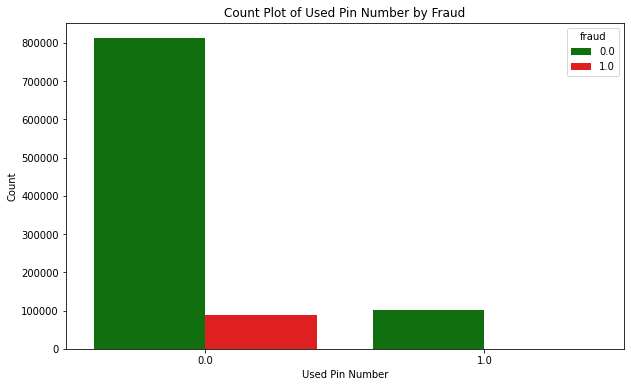

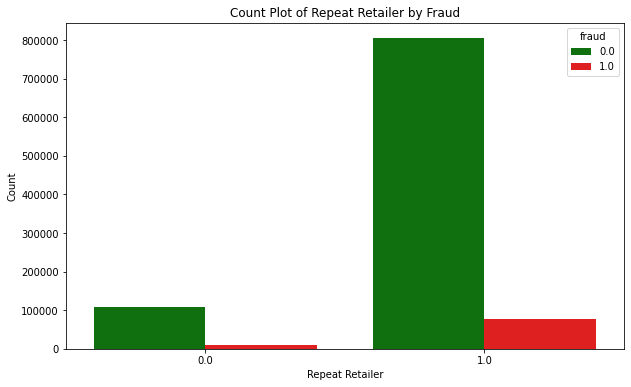

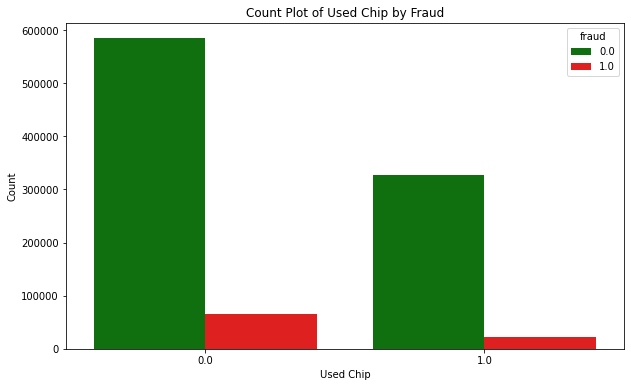

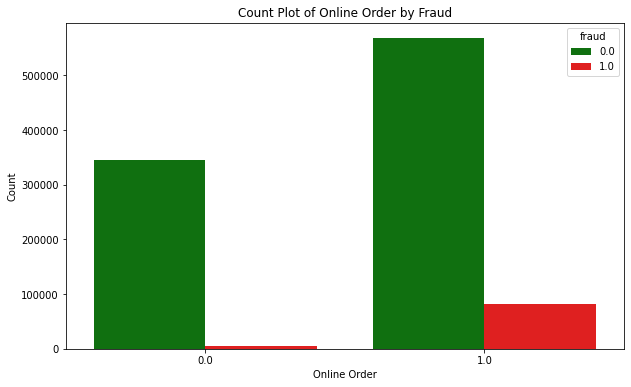

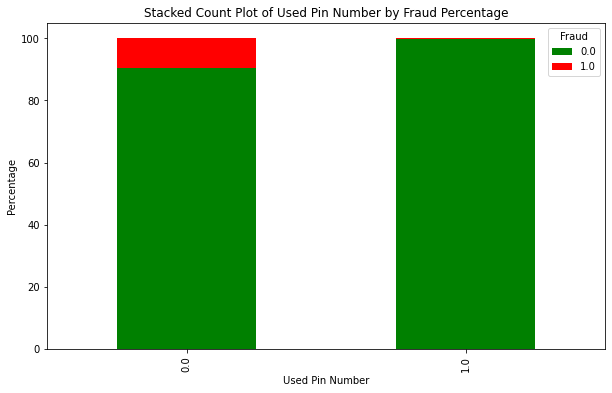

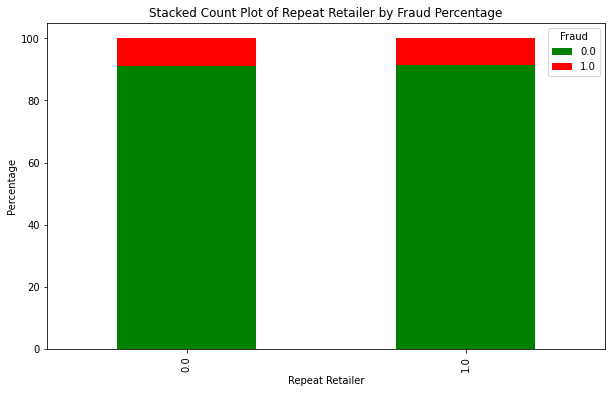

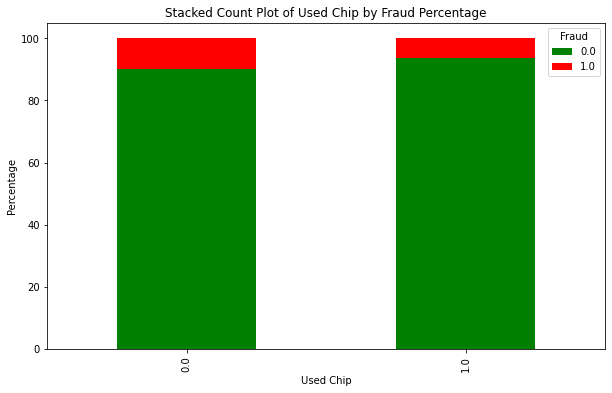

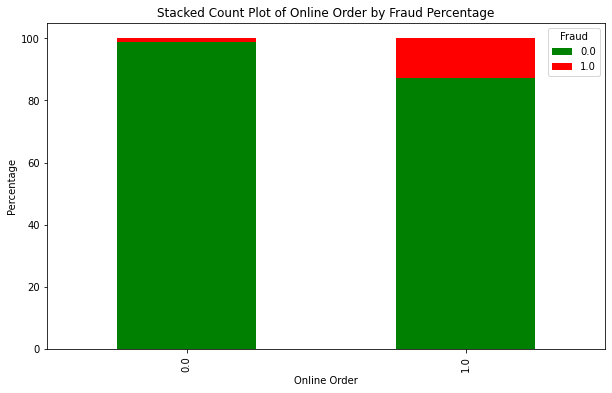

In [30]:
# Create count plots for 'used_pin', 'repeat_retailer', 'used_chip' colored by 'fraud'
columns_to_plot = ['used_pin_number', 'repeat_retailer', 'used_chip', 'online_order']

for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cleaned_data, x=column, hue='fraud', palette={0: 'green', 1: 'red'})
    plt.title(f'Count Plot of {column.replace("_", " ").title()} by Fraud')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Count')
    plt.show()

# Create stacked count plots for the percentage of transactions that were fraudulent
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    fraud_counts = cleaned_data.groupby([column, 'fraud']).size().unstack(fill_value=0)
    fraud_percentages = fraud_counts.div(fraud_counts.sum(axis=1), axis=0) * 100
    
    # Plotting the percentages manually
    fraud_percentages.plot(kind='bar', stacked=True, color=['green', 'red'], ax=plt.gca())
    plt.title(f'Stacked Count Plot of {column.replace("_", " ").title()} by Fraud Percentage')
    plt.xlabel(column.replace("_", " ").title())
    plt.ylabel('Percentage')
    plt.legend(title='Fraud')
    plt.show()

Prompt: create a scatter plot colored red and green as the plots above, with x as distance from home, then distance from home, then distance from last transaction, and y should be ratio to median purchase price, distance from last transaction, and then ratio to media purchase price

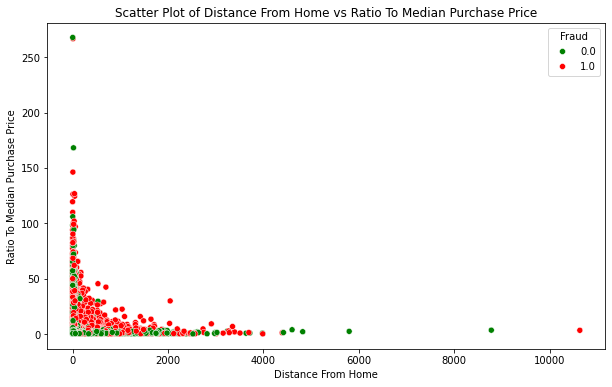

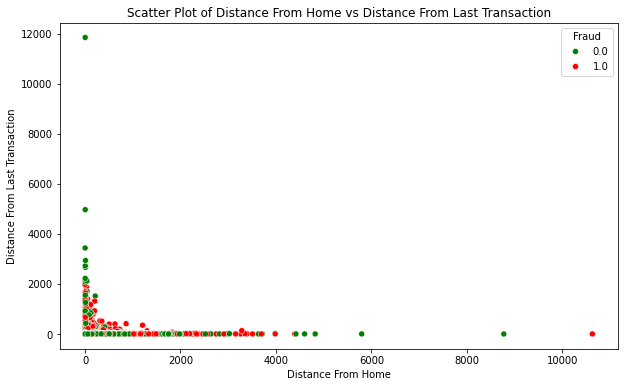

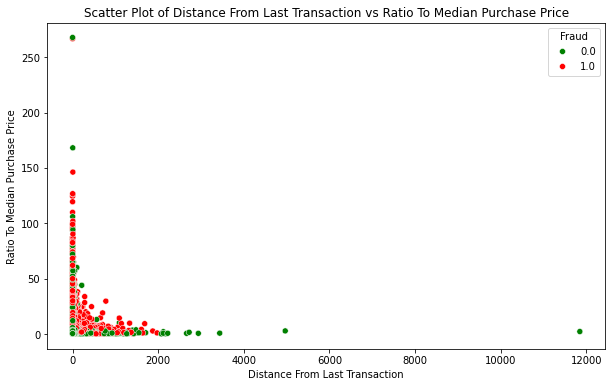

In [31]:
# Create scatter plots with specified x and y columns, colored by 'fraud'
scatter_plots = [
    ('distance_from_home', 'ratio_to_median_purchase_price'),
    ('distance_from_home', 'distance_from_last_transaction'),
    ('distance_from_last_transaction', 'ratio_to_median_purchase_price')
]

for x_col, y_col in scatter_plots:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=cleaned_data, x=x_col, y=y_col, hue='fraud', palette={0: 'green', 1: 'red'})
    plt.title(f'Scatter Plot of {x_col.replace("_", " ").title()} vs {y_col.replace("_", " ").title()}')
    plt.xlabel(x_col.replace("_", " ").title())
    plt.ylabel(y_col.replace("_", " ").title())
    plt.legend(title='Fraud')
    plt.show()

Prompt: import train_test_split, standardscaler, kneighborsclassifier, confusion matrix, classification report, accuracy score, precision, recall score, and f1 score for machine learning

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score

Prompt: split data into X and y with features and target variables, then split into training and test sets with an 80/20 split and a random state of 42, stratifying on y

In [35]:
# Define features (X) and target (y)
X = data.drop(columns=['fraud'])
y = data['fraud']

# Split the data into training and test sets with an 80/20 split and a random state of 42, stratifying on y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Prompt: create a never_fraud prediction model that creates a prediction array where every transaction is classified as not fraudulent. print the first 100 predictions

In [37]:
# Create a never_fraud prediction model
def never_fraud_model(X):
    # Create a prediction array where every transaction is classified as not fraudulent (0)
    predictions = [0] * len(X)
    return predictions

# Generate predictions for the test set
never_fraud_predictions = never_fraud_model(X_test)

# Print the first 100 predictions
print("First 100 predictions of the never_fraud model:")
print(never_fraud_predictions[:100])

First 100 predictions of the never_fraud model:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [40]:
# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions on the test set
knn_predictions = knn.predict(X_test)

# Print the first 100 predictions
print("First 100 predictions of the KNN classifier:")
print(knn_predictions[:100])


First 100 predictions of the KNN classifier:
[0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]


/home/jupyter-efunk/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-efunk/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jupyter-efunk/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix for the never_fraud model:
[[182519      0]
 [ 17481      0]]

Classification Report for the never_fraud model:
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95    182519
         1.0       0.00      0.00      0.00     17481

    accuracy                           0.91    200000
   macro avg       0.46      0.50      0.48    200000
weighted avg       0.83      0.91      0.87    200000

Confusion Matrix for the KNN classifier:
[[180612   1907]
 [  1254  16227]]

Classification Report for the KNN classifier:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99    182519
         1.0       0.89      0.93      0.91     17481

    accuracy                           0.98    200000
   macro avg       0.94      0.96      0.95    200000
weighted avg       0.98      0.98      0.98    200000



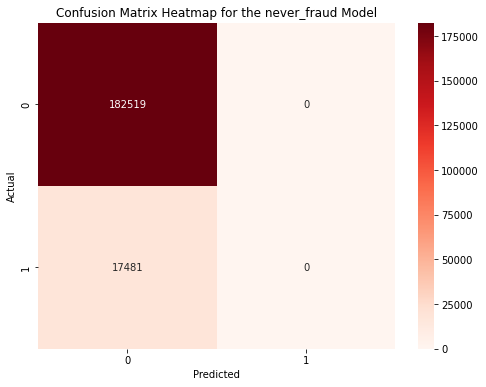

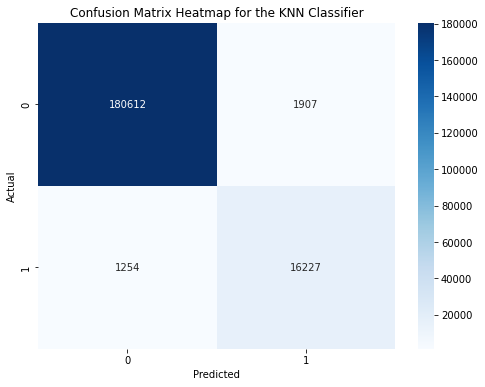

In [43]:
# Create confusion matrix and classification report for the never_fraud model
never_fraud_cm = confusion_matrix(y_test, never_fraud_predictions)
never_fraud_cr = classification_report(y_test, never_fraud_predictions)

print("Confusion Matrix for the never_fraud model:")
print(never_fraud_cm)
print("\nClassification Report for the never_fraud model:")
print(never_fraud_cr)

# Create confusion matrix and classification report for the KNN classifier
knn_cm = confusion_matrix(y_test, knn_predictions)
knn_cr = classification_report(y_test, knn_predictions)

print("Confusion Matrix for the KNN classifier:")
print(knn_cm)
print("\nClassification Report for the KNN classifier:")
print(knn_cr)

# Plot heatmap for confusion matrix of the never_fraud model
plt.figure(figsize=(8, 6))
sns.heatmap(never_fraud_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix Heatmap for the never_fraud Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot heatmap for confusion matrix of the KNN classifier
plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap for the KNN Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/home/jupyter-efunk/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


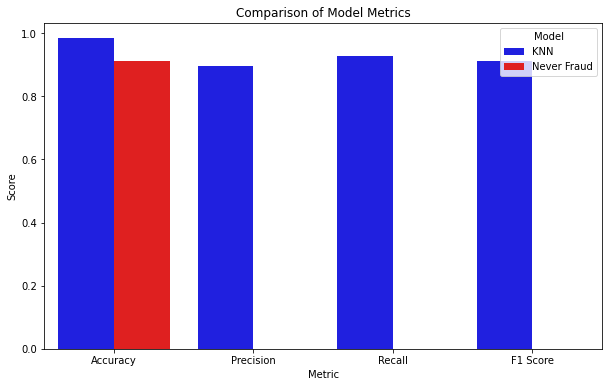

In [44]:
# Compute metrics for the never_fraud model
never_fraud_accuracy = accuracy_score(y_test, never_fraud_predictions)
never_fraud_precision = precision_score(y_test, never_fraud_predictions)
never_fraud_recall = recall_score(y_test, never_fraud_predictions)
never_fraud_f1 = f1_score(y_test, never_fraud_predictions)

# Compute metrics for the KNN classifier
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'KNN': [knn_accuracy, knn_precision, knn_recall, knn_f1],
    'Never Fraud': [never_fraud_accuracy, never_fraud_precision, never_fraud_recall, never_fraud_f1]
})

# Melt the dataframe for easier plotting
metrics_melted_df = metrics_df.melt(id_vars='Metric', var_name='Model', value_name='Score')

# Create a bar plot to compare the scores
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted_df, x='Metric', y='Score', hue='Model', palette={'KNN': 'blue', 'Never Fraud': 'red'})
plt.title('Comparison of Model Metrics')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.show()